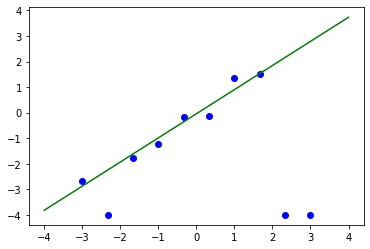

In [25]:
import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(1)


def generate_sample(x_min=-3., x_max=3., sample_size=10):
    x = np.linspace(x_min, x_max, num=sample_size)
    y = x + np.random.normal(loc=0., scale=.2, size=sample_size)
    y[-1] = y[-2] = y[1] = -4  # outliers
    return x, y


def build_design_matrix(x):
    phi = np.empty(x.shape + (2,))
    phi[:, 0] = 1.
    phi[:, 1] = x
    return phi


def iterative_reweighted_least_squares(x, y, eta=1., n_iter=1000):
    phi = build_design_matrix(x)
    # initialize theta using the solution of regularized ridge regression
    theta = theta_prev = np.linalg.solve(
        phi.T.dot(phi) + 1e-4 * np.identity(phi.shape[1]), phi.T.dot(y))
    for _ in range(n_iter):
        r = np.abs(phi.dot(theta_prev) - y)
        
        #テューキー回帰のw更新
        w = np.diag(np.where(r > eta, 0, (1 - (r**2)/(eta**2))**2)) #変更箇所

        phit_w_phi = phi.T.dot(w).dot(phi)
        phit_w_y = phi.T.dot(w).dot(y)
        theta = np.linalg.solve(phit_w_phi, phit_w_y)
        if np.linalg.norm(theta - theta_prev) < 1e-3:
            break
        theta_prev = theta
    return theta


def predict(x, theta):
    phi = build_design_matrix(x)
    return phi.dot(theta)


def visualize(x, y, theta, x_min=-4., x_max=4., filename='lecture4-p31.png'):
    X = np.linspace(x_min, x_max, 1000)
    Y = predict(X, theta)
    plt.clf()
    plt.plot(X, Y, color='green')
    plt.scatter(x, y, c='blue', marker='o')
    plt.savefig(filename)


x, y = generate_sample()
theta = iterative_reweighted_least_squares(x, y, eta=1.)
visualize(x, y, theta)


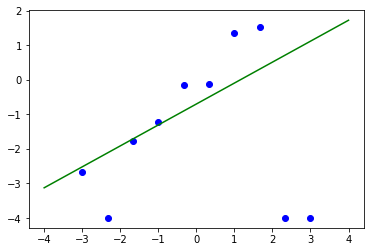

In [13]:
#フーバー回帰の実装（サンプルコード）

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(1)


def generate_sample(x_min=-3., x_max=3., sample_size=10):
    x = np.linspace(x_min, x_max, num=sample_size)
    y = x + np.random.normal(loc=0., scale=.2, size=sample_size)
    y[-1] = y[-2] = y[1] = -4  # outliers
    return x, y


def build_design_matrix(x):
    phi = np.empty(x.shape + (2,))
    phi[:, 0] = 1.
    phi[:, 1] = x
    return phi


def iterative_reweighted_least_squares(x, y, eta=1., n_iter=1000):
    phi = build_design_matrix(x)
    # initialize theta using the solution of regularized ridge regression
    theta = theta_prev = np.linalg.solve(
        phi.T.dot(phi) + 1e-4 * np.identity(phi.shape[1]), phi.T.dot(y))
    for _ in range(n_iter):
        r = np.abs(phi.dot(theta_prev) - y)
        w = np.diag(np.where(r > eta, eta / r, 1.))
        phit_w_phi = phi.T.dot(w).dot(phi)
        phit_w_y = phi.T.dot(w).dot(y)
        theta = np.linalg.solve(phit_w_phi, phit_w_y)
        if np.linalg.norm(theta - theta_prev) < 1e-3:
            break
        theta_prev = theta
    return theta


def predict(x, theta):
    phi = build_design_matrix(x)
    return phi.dot(theta)


def visualize(x, y, theta, x_min=-4., x_max=4., filename='lecture4-p31.png'):
    X = np.linspace(x_min, x_max, 1000)
    Y = predict(X, theta)
    plt.clf()
    plt.plot(X, Y, color='green')
    plt.scatter(x, y, c='blue', marker='o')
    plt.savefig(filename)


x, y = generate_sample()
theta = iterative_reweighted_least_squares(x, y, eta=1.)
visualize(x, y, theta)
